In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import time
import sklearn
from tabulate import tabulate
import networkx as nx
import nxviz as nv
# for Notebook
from tqdm import tqdm
import numpy as np

import pylab
import numpy as np
from scipy import stats

%matplotlib inline

# Downstream analysis

In [53]:
X = pd.read_csv('/scratch/gh8sj/brown_nsclc/data/output_data/q3_luad_grade_no690_target_neighbor_center_cell_act.csv', index_col=0)
X

,tumor CD8 IFNg+ %,tumor Number of CD8s,tumor CD3 IFNg+ %,tumor Number of CD3s,tumor NK IFNg+ %,tumor Number of NKs,tumor Tumor cell MHC1+ %,tumor Number of Tumor cells,tumor CD8 act CD3+CD8+IFNy+ Tumor Neighbors_30um,tumor CD8 act CD3+CD8+IFNy+ Stroma Neighbors_30um,...,stroma MHC1- Tumor CD56+CD3-IFNy+ Tumor Neighbors_200um,stroma MHC1- Tumor CD56+CD3-IFNy+ Stroma Neighbors_200um,stroma MHC1- Tumor CD56+CD3-IFNy- Tumor Neighbors_200um,stroma MHC1- Tumor CD56+CD3-IFNy- Stroma Neighbors_200um,stroma MHC1- Tumor PanCyto+MHCI+ Tumor Neighbors_200um,stroma MHC1- Tumor PanCyto+MHCI+ Stroma Neighbors_200um,stroma MHC1- Tumor PanCyto+MHCI- Tumor Neighbors_200um,stroma MHC1- Tumor PanCyto+MHCI- Stroma Neighbors_200um,grade,patient
"17-185_[46209,14980]",0.000000,150.0,0.000000,540.0,0.000000,112.0,0.317752,3594.0,0.000000,0.0,...,0.000000,0.000000,1.945910,0.000000,3.772761,2.708050,5.465948,2.079442,low grade,17-185
"17-185_[46405,13480]",0.008403,238.0,0.000000,528.0,0.000000,228.0,0.133117,6776.0,0.693147,0.0,...,0.000000,0.000000,2.944439,1.421386,3.610918,1.550597,5.932245,1.145132,low grade,17-185
"17-185_[46736,11980]",0.000000,184.0,0.000000,514.0,0.000000,680.0,0.109358,7352.0,0.000000,0.0,...,0.000000,0.000000,2.512306,0.000000,3.476099,0.847298,5.309917,0.693147,low grade,17-185
"17-185_[47168,10480]",0.000000,8.0,0.000000,76.0,0.000000,22.0,0.240506,1106.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,2.944439,2.564949,4.465908,0.693147,low grade,17-185
"17-185_[48216,14980]",0.000000,540.0,0.000000,1848.0,0.000000,556.0,0.184507,15078.0,0.000000,0.0,...,0.000000,0.000000,2.683049,0.711496,5.264607,2.456736,6.201110,2.142242,low grade,17-185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"17-536_[47032,15356]",0.083333,84.0,0.024952,521.0,0.153846,13.0,0.437700,1565.0,1.272966,0.0,...,0.028988,0.009756,0.573524,1.062003,4.160720,3.018031,4.541938,2.572463,high grade,17-536
"17-536_[47032,16856]",0.025000,40.0,0.002688,372.0,0.666667,9.0,0.464430,1490.0,0.000000,0.0,...,0.329182,0.065597,0.156569,0.016807,4.000841,3.512304,4.442452,2.294074,high grade,17-536
"17-536_[49039,10345]",0.000000,34.0,0.000000,231.0,0.000000,21.0,0.233633,3116.0,0.000000,0.0,...,0.000000,0.000000,0.559616,0.154151,3.697178,1.592631,4.750712,0.916291,high grade,17-536
"17-536_[49039,11845]",0.000000,42.0,0.000000,248.0,0.000000,30.0,0.236631,3123.0,0.000000,0.0,...,0.000000,0.000000,0.655407,0.441833,3.561677,1.885947,4.689647,1.413693,high grade,17-536


In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

from scipy.stats import zscore 

y_str = X['grade']
X = X.drop(columns=['grade', 'patient'])
y = y_str.apply(lambda x: 1 if x == 'high grade' else -1)
X = X.fillna(0)
X = stats.zscore(X, ddof = 1)


#z_score_x = zscore(X.astype(float), axis = 1, ddof=1)

# parameters to be tested on GridSearchCV


# Number of Folds and adding the random state for replication

# Initializing the Model
#lassocv = LassoCV(alphas=[1E-5, 1E-4, 1E-3, 1E-2, 1E-1, 1],cv = 10)
lassocv = LassoCV(alphas=[1E-1, 1],cv = 10)


# GridSearchCV with model, params and folds.
lassocv.fit(X,y)
lasso_feat = lassocv.coef_
selected_features = np.array(X.columns)[lasso_feat != 0]
lasso_selected_x = X.loc[:,X.columns.isin(selected_features)]

# increase n_iter to supress warnings

In [55]:
selected_features

array(['tumor Tumor cell MHC1+ %',
       'tumor CD8 act CD3+CD8+IFNy+ Stroma Neighbors_30um',
       'tumor CD8 inact CD3+CD8-IFNy- Tumor Neighbors_30um',
       'tumor CD8 inact PanCyto+MHCI- Stroma Neighbors_200um',
       'tumor CD3 act CD3+CD8+IFNy- Tumor Neighbors_30um',
       'tumor NK inact CD56+CD3-IFNy- Tumor Neighbors_30um',
       'tumor NK inact CD56+CD3-IFNy- Tumor Neighbors_200um',
       'tumor NK inact PanCyto+MHCI- Stroma Neighbors_200um',
       'tumor MHC1- Tumor CD3+CD8+IFNy- Tumor Neighbors_30um',
       'tumor MHC1- Tumor PanCyto+MHCI- Tumor Neighbors_30um',
       'tumor MHC1- Tumor CD3+CD8+IFNy- Tumor Neighbors_200um',
       'stroma Number of CD8s',
       'stroma CD8 act CD3+CD8-IFNy- Tumor Neighbors_30um',
       'stroma CD8 inact CD3+CD8-IFNy- Tumor Neighbors_30um',
       'stroma CD8 inact PanCyto+MHCI- Tumor Neighbors_30um',
       'stroma CD3 inact PanCyto+MHCI+ Tumor Neighbors_30um',
       'stroma NK act CD3+CD8-IFNy- Tumor Neighbors_30um',
       'st

In [56]:


X = pd.read_csv('/scratch/gh8sj/brown_nsclc/data/output_data/q3_luad_grade_no690_target_neighbor_center_cell_act.csv', index_col=0)
y_str = X['grade']
X = X.drop(columns=['grade','patient'])
X = X.loc[:,X.columns.isin(selected_features)]
#X.to_csv('/scratch/gh8sj/brown_nsclc/data/output_data/lasso_selected_q3_grade_center_cell_act_location.csv')
X = stats.zscore(X, ddof = 0)
y = y_str.apply(lambda x: 1 if x == 'high grade' else -1)
y
X

,tumor Tumor cell MHC1+ %,tumor CD8 act CD3+CD8+IFNy+ Stroma Neighbors_30um,tumor CD8 inact CD3+CD8-IFNy- Tumor Neighbors_30um,tumor CD8 inact PanCyto+MHCI- Stroma Neighbors_200um,tumor CD3 act CD3+CD8+IFNy- Tumor Neighbors_30um,tumor NK inact CD56+CD3-IFNy- Tumor Neighbors_30um,tumor NK inact CD56+CD3-IFNy- Tumor Neighbors_200um,tumor NK inact PanCyto+MHCI- Stroma Neighbors_200um,tumor MHC1- Tumor CD3+CD8+IFNy- Tumor Neighbors_30um,tumor MHC1- Tumor PanCyto+MHCI- Tumor Neighbors_30um,...,stroma Number of CD8s,stroma CD8 act CD3+CD8-IFNy- Tumor Neighbors_30um,stroma CD8 inact CD3+CD8-IFNy- Tumor Neighbors_30um,stroma CD8 inact PanCyto+MHCI- Tumor Neighbors_30um,stroma CD3 inact PanCyto+MHCI+ Tumor Neighbors_30um,stroma NK act CD3+CD8-IFNy- Tumor Neighbors_30um,stroma NK inact CD56+CD3-IFNy- Tumor Neighbors_30um,stroma NK inact PanCyto+MHCI- Tumor Neighbors_30um,stroma MHC1+ Tumor CD3+CD8-IFNy- Stroma Neighbors_30um,stroma MHC1+ Tumor PanCyto+MHCI- Stroma Neighbors_30um
"17-185_[46209,14980]",0.357714,-0.292008,2.233255,-0.136131,-0.357573,2.502473,2.375839,-0.247220,0.858702,1.127593,...,-0.245104,-0.302120,3.050322,1.036113,-0.309979,-0.201597,2.879569,0.979618,2.086849,-0.131921
"17-185_[46405,13480]",-0.362178,-0.292008,0.568147,-0.266464,-0.357573,1.939674,2.233772,0.284923,0.534306,1.064041,...,-0.083306,-0.302120,0.457700,1.174475,-0.309979,-0.201597,1.010355,1.161356,1.281037,-0.319353
"17-185_[46736,11980]",-0.454814,-0.292008,1.611058,-0.664162,-0.357573,2.510585,2.778081,-0.605898,0.107876,1.117481,...,-0.234777,-0.302120,1.673294,0.271553,-0.309979,-0.201597,3.912614,1.397245,0.976486,-0.559327
"17-185_[47168,10480]",0.056533,-0.292008,0.981629,-0.894804,-0.357573,2.489878,1.596312,-0.736695,-0.594193,0.413581,...,-0.410345,-0.302120,4.623145,1.125864,-0.309979,-0.201597,-0.433457,-0.886598,0.950990,-0.281126
"17-185_[48216,14980]",-0.161807,-0.292008,2.435401,0.815678,-0.357573,2.353445,2.408537,0.420424,0.705183,1.466422,...,0.353892,-0.302120,2.577287,1.536096,-0.309979,-0.201597,3.031649,2.475356,1.906824,0.731175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"17-536_[47032,15356]",0.825391,-0.292008,2.244919,1.733529,3.894660,-0.857013,-0.604966,2.147825,-0.315280,-1.009658,...,-0.248547,-0.302120,2.191189,-0.305136,2.943725,-0.201597,0.087230,0.204096,1.337921,0.294736
"17-536_[47032,16856]",0.929611,-0.292008,1.653788,1.755664,-0.357573,-0.857013,-0.532781,1.275603,-0.484362,-0.972401,...,-0.276087,1.902528,1.737979,-0.752097,2.323270,-0.201597,-0.433457,-0.886598,1.297793,0.106494
"17-536_[49039,10345]",0.029734,-0.292008,0.321312,-0.119368,-0.357573,-0.471615,-0.292523,-0.247220,-0.547282,-0.811650,...,-0.396575,-0.302120,0.191891,-0.110122,-0.309979,-0.201597,-0.433457,-0.238001,-0.908287,-0.042274
"17-536_[49039,11845]",0.041425,-0.292008,0.728692,-0.254039,-0.357573,-0.221109,0.203445,0.095123,-0.513258,-1.098042,...,-0.408624,-0.302120,0.103533,0.760029,-0.309979,-0.201597,-0.433457,0.525140,-1.057628,-0.366930


In [57]:
list(X.columns)

['tumor Tumor cell MHC1+ %',
 'tumor CD8 act CD3+CD8+IFNy+ Stroma Neighbors_30um',
 'tumor CD8 inact CD3+CD8-IFNy- Tumor Neighbors_30um',
 'tumor CD8 inact PanCyto+MHCI- Stroma Neighbors_200um',
 'tumor CD3 act CD3+CD8+IFNy- Tumor Neighbors_30um',
 'tumor NK inact CD56+CD3-IFNy- Tumor Neighbors_30um',
 'tumor NK inact CD56+CD3-IFNy- Tumor Neighbors_200um',
 'tumor NK inact PanCyto+MHCI- Stroma Neighbors_200um',
 'tumor MHC1- Tumor CD3+CD8+IFNy- Tumor Neighbors_30um',
 'tumor MHC1- Tumor PanCyto+MHCI- Tumor Neighbors_30um',
 'tumor MHC1- Tumor CD3+CD8+IFNy- Tumor Neighbors_200um',
 'stroma Number of CD8s',
 'stroma CD8 act CD3+CD8-IFNy- Tumor Neighbors_30um',
 'stroma CD8 inact CD3+CD8-IFNy- Tumor Neighbors_30um',
 'stroma CD8 inact PanCyto+MHCI- Tumor Neighbors_30um',
 'stroma CD3 inact PanCyto+MHCI+ Tumor Neighbors_30um',
 'stroma NK act CD3+CD8-IFNy- Tumor Neighbors_30um',
 'stroma NK inact CD56+CD3-IFNy- Tumor Neighbors_30um',
 'stroma NK inact PanCyto+MHCI- Tumor Neighbors_30um',
 

100%|██████████| 1000/1000 [00:08<00:00, 120.01it/s]


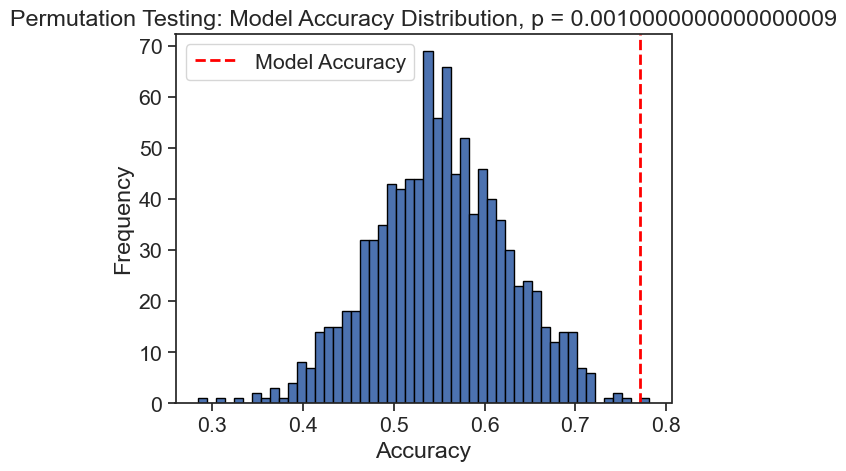

In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import bisect

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from pyopls import OPLS
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.metrics import r2_score, accuracy_score


def count_values_greater_than(sorted_list, target_value):
    # Use bisect_right to find the index of the first element greater than the target_value
    index = bisect.bisect_right(sorted_list, target_value)
    
    # The count of values greater than the target_value is the length of the list minus the index
    count = len(sorted_list) - index
    
    return count

def round_to_sign(value):
    if value >= 0:
        return np.ceil(value)
    else:
        return np.floor(value)





# do you orthogoranlize all the permutations? -> yes



# Generate some example data
np.random.seed(42)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
opls = OPLS(2) # 1 components
Z = opls.fit_transform(X, y)
pls_model = PLSRegression(2)


pls_model.fit(Z, y)
#y_pred= pls.predict(X)
processed_y_pred = cross_val_predict(pls_model, Z, y, cv=5)

                           
processed_q_squared = r2_score(y, processed_y_pred) 
processed_dq_squared = r2_score(y, np.clip(processed_y_pred, -1, 1))  # 0.984
processed_accuracy = accuracy_score(y, np.sign(processed_y_pred))  # 1.0
processed_accuracy_rounded = round(processed_accuracy,2)

variance_in_x = np.var(pls_model.x_scores_, axis = 0) 
total_variance_in_x = np.var(Z, axis = 0)
# normalize variance by total variance:
#fractions_of_explained_variance = variance_in_x / total_variance_in_x

r2_X = opls.score(X)  # 7.8e-12 (most variance is removed)


# Number of permutations
num_permutations = 1000

# List to store permutation accuracies
permuted_accuracies = []

# Permutation testing loop
for _ in tqdm(range(num_permutations)):
    # Randomly permute the labels
    permuted_labels = np.random.permutation(y)
    
    
#processed_y_pred = cross_val_predict(pls, Z, y, cv=1000)
#processed_q_squared = r2_score(y, processed_y_pred)  # 0.981
#processed_dq_squared = r2_score(y, np.clip(processed_y_pred, -1, 1))  # 0.984
#processed_accuracy = accuracy_score(y, np.sign(processed_y_pred))  # 1.0
    opls = OPLS(2) # 1 components
    Z_i = opls.fit_transform(X, permuted_labels)

    #permuted_model.fit(X, permuted_labels)
    pls = PLSRegression(1)
    permuted_pred = cross_val_predict(pls, Z_i, permuted_labels, cv=5) # I should change this to something smaller, leave one out would literally take foever
    # Make predictions with the permuted model
    #permuted_predictions = permuted_model.predict(X)
    
    # Calculate accuracy and store in the list
    permuted_pred = [round_to_sign(value) for value in permuted_pred]# Round each value in the list based on the specified rules


    permuted_accuracy = accuracy_score(y, permuted_pred)
    permuted_accuracies.append(permuted_accuracy)

    
permuted_accuracies = pd.Series(np.sort(permuted_accuracies), index = range(1000))
result_count = count_values_greater_than(permuted_accuracies, processed_accuracy)
p = 1-(1000-result_count)/1000
p_round = round(p,3)

# Plotting the histogram
plt.hist(permuted_accuracies, bins=50, edgecolor='black')
plt.axvline(x=processed_accuracy, color='red', linestyle='dashed', linewidth=2, label='Model Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title(f'Permutation Testing: Model Accuracy Distribution, p = {p}')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Loadings for oPLSDA model')

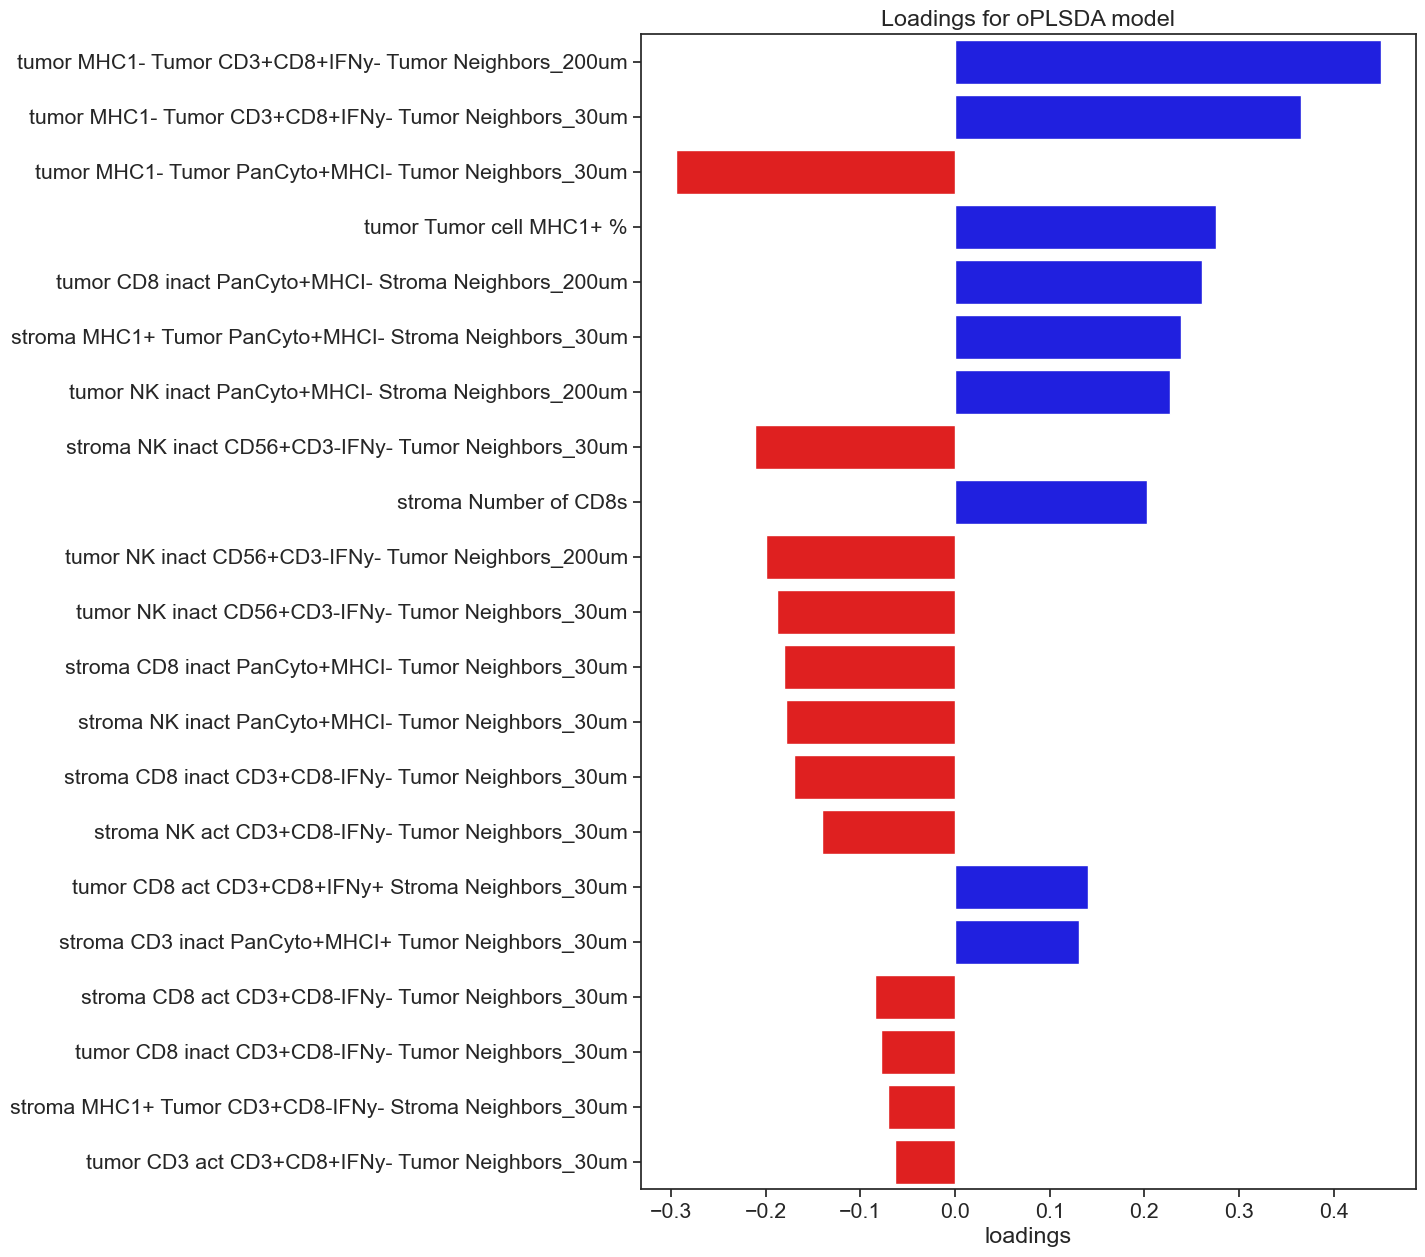

In [59]:
plt.figure(figsize=(10, 15)) 
x_loadings = pd.DataFrame(pls_model.x_loadings_[:,0].flatten(), index= X.columns, columns = ['loadings'])
x_loadings['color'] = np.where(x_loadings['loadings'] > 0, 'blue', 'red')
colors = {'red': 'red', 'blue': 'blue'}

x_loadings['abs_val'] = abs(x_loadings['loadings'])
x_loadings = x_loadings.sort_values(by = 'abs_val', ascending=False)
sns.barplot(data = x_loadings, x=x_loadings['loadings'],y = x_loadings.index, hue = 'color', palette = colors)
plt.legend().set_visible(False)
plt.ylabel('')
plt.title('Loadings for oPLSDA model')
#plt.savefig('/home/gh8sj/projects/gabe_kate_method/figures/nsclc/final_figures/alt_q3_grade.pdf',format='pdf', bbox_inches = 'tight')

<Figure size 400x600 with 0 Axes>

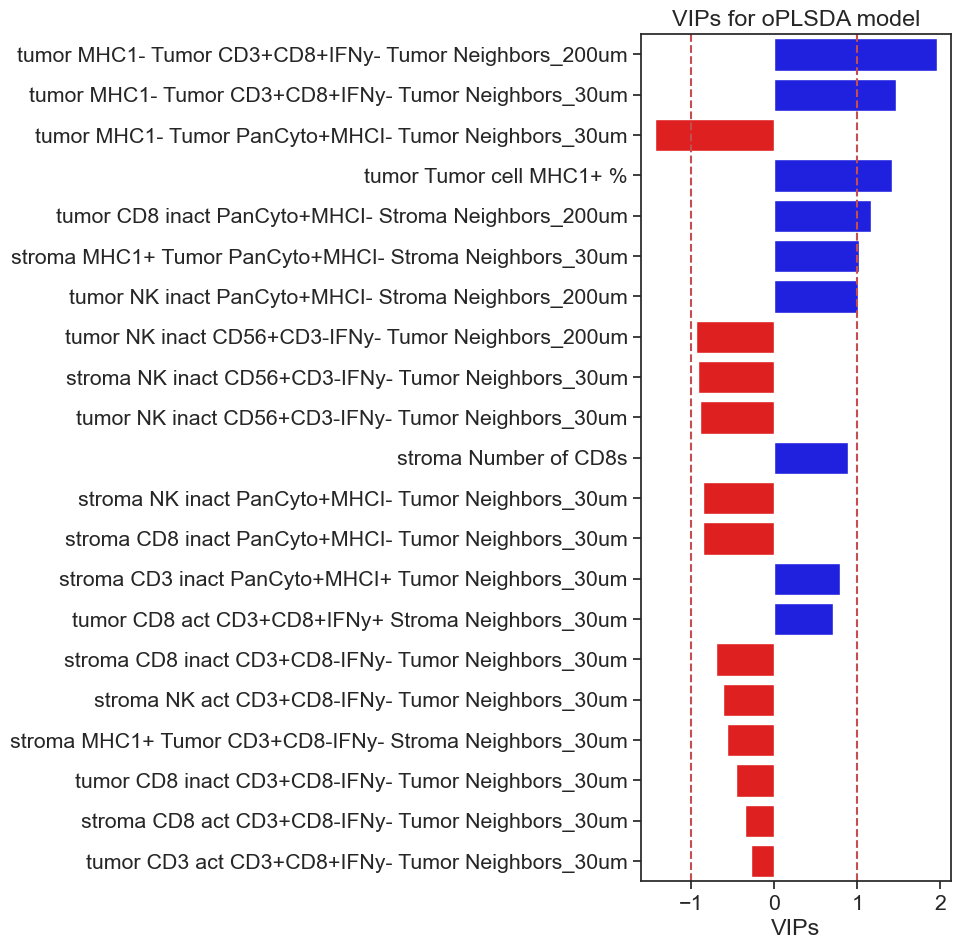

In [60]:

# lets try to make a VIP score with the same logic as Rem's code:
# Calculate VIP scores
def vip_efficient(model):
    t = model.x_scores_
    w = model.x_weights_ # replace with x_rotations_ if needed
    q = model.y_loadings_ 
    features_, _ = w.shape
    vip = np.zeros(shape=(features_,))
    inner_sum = np.diag(t.T @ t @ q.T @ q)
    SS_total = np.sum(inner_sum)
    vip = np.sqrt(features_*(w**2 @ inner_sum)/ SS_total)
    return vip

vips = vip_efficient(pls_model)



sns.set(font_scale = 1.4)
sns.set_style("ticks")
plt.figure(figsize=(4, 6)) 
plt.figure(figsize=(4, 11)) 

loadings_vips = pd.DataFrame(pls_model.x_loadings_[:,0].flatten(), index= X.columns, columns = ['loadings'])
loadings_vips['VIPs'] = vips
loadings_vips['color'] = np.where(loadings_vips['loadings'] > 0, 'short', 'long')
colors = {'short': 'blue', 'long': 'red'}

loadings_vips = loadings_vips.sort_values(by = 'VIPs', ascending=False)
for i in loadings_vips.index:
    if loadings_vips.loc[i,'loadings'] < 0:
        loadings_vips.loc[i,'VIPs'] = loadings_vips.loc[i,'VIPs']*-1
sns.barplot(data = loadings_vips, x=loadings_vips['VIPs'],y = loadings_vips.index, hue = 'color', palette = colors)
plt.axvline(x = -1, color = 'r', linestyle='--')
plt.axvline(x = 1, color = 'r', linestyle='--')
plt.legend().set_visible(False)
plt.ylabel('')
plt.title('VIPs for oPLSDA model')
plt.show()

In [61]:
loadings_vips['label'] = loadings_vips['color']
loadings_vips['color'] = np.where(loadings_vips['loadings'] > 0, 'blue', 'red')

In [62]:
loadings_vips[abs(loadings_vips['VIPs']) >= 0.99].index

Index(['tumor MHC1- Tumor CD3+CD8+IFNy- Tumor Neighbors_200um',
       'tumor MHC1- Tumor CD3+CD8+IFNy- Tumor Neighbors_30um',
       'tumor MHC1- Tumor PanCyto+MHCI- Tumor Neighbors_30um',
       'tumor Tumor cell MHC1+ %',
       'tumor CD8 inact PanCyto+MHCI- Stroma Neighbors_200um',
       'stroma MHC1+ Tumor PanCyto+MHCI- Stroma Neighbors_30um',
       'tumor NK inact PanCyto+MHCI- Stroma Neighbors_200um'],
      dtype='object')

In [63]:
lasso_X = X
grade_vips = list(lasso_X.columns)
color_dict = {}

# Iterate over the DataFrame rows
for index, row in loadings_vips.iterrows():
    color = row['color']
    color_dict[index] = color

print(color_dict)

{'tumor MHC1- Tumor CD3+CD8+IFNy- Tumor Neighbors_200um': 'blue', 'tumor MHC1- Tumor CD3+CD8+IFNy- Tumor Neighbors_30um': 'blue', 'tumor MHC1- Tumor PanCyto+MHCI- Tumor Neighbors_30um': 'red', 'tumor Tumor cell MHC1+ %': 'blue', 'tumor CD8 inact PanCyto+MHCI- Stroma Neighbors_200um': 'blue', 'stroma MHC1+ Tumor PanCyto+MHCI- Stroma Neighbors_30um': 'blue', 'tumor NK inact PanCyto+MHCI- Stroma Neighbors_200um': 'blue', 'tumor NK inact CD56+CD3-IFNy- Tumor Neighbors_200um': 'red', 'stroma NK inact CD56+CD3-IFNy- Tumor Neighbors_30um': 'red', 'tumor NK inact CD56+CD3-IFNy- Tumor Neighbors_30um': 'red', 'stroma Number of CD8s': 'blue', 'stroma NK inact PanCyto+MHCI- Tumor Neighbors_30um': 'red', 'stroma CD8 inact PanCyto+MHCI- Tumor Neighbors_30um': 'red', 'stroma CD3 inact PanCyto+MHCI+ Tumor Neighbors_30um': 'blue', 'tumor CD8 act CD3+CD8+IFNy+ Stroma Neighbors_30um': 'blue', 'stroma CD8 inact CD3+CD8-IFNy- Tumor Neighbors_30um': 'red', 'stroma NK act CD3+CD8-IFNy- Tumor Neighbors_30um':

# correlation network

In [64]:
X = pd.read_csv('/scratch/gh8sj/brown_nsclc/data/output_data/q3_luad_grade_no690_target_neighbor_center_cell_act.csv', index_col=0)


In [65]:
X = X.drop(['patient', 'grade'],axis = 1)

In [66]:
corr = X.corr()
corr.columns.name = ''

In [67]:
links = corr.stack().reset_index()
links.columns = ['var1', 'var2', 'value']

plsr_links = links[links['var1'].isin(grade_vips)]

# Correlates of the LASSO-selected features are depicted in network format. 
#Only correlation coefficients with multiple comparison corrected P values <.05 and Spearman correlation coefficients >0.3 are included. 

plsr_links_filtered=plsr_links.loc[(plsr_links['value'] > 0.85) & (plsr_links['var1'] != plsr_links['var2']) ]

In [68]:
corr_filt = corr[corr.index.isin(plsr_links_filtered['var2']) |  corr.index.isin(plsr_links_filtered['var1'])]
corr_filt = corr_filt[corr_filt.columns[corr_filt.columns.isin(plsr_links_filtered['var2']) |  corr.index.isin(plsr_links_filtered['var1'])]]
corr_filt;

In [69]:
# for cytoscape:
def correlation_p_value(x, y):
    _, p_value = stats.pearsonr(x, y)
    return p_value

# Create a DataFrame to hold the p-values
p_values = pd.DataFrame(np.zeros((len(corr), len(corr))), 
                        index=corr.columns, 
                        columns=corr.columns)

for col1 in corr.columns:
    for col2 in corr.columns:
        if col1 != col2:
            p_values.loc[col1, col2] = correlation_p_value(X[col1], X[col2])

In [70]:
rows = []

for col1 in corr.columns:
    for col2 in corr.columns:
        if col1 != col2:
            r = corr.loc[col1, col2]
            p = p_values.loc[col1, col2]
            r2 = r ** 2
            rows.append([col1, col2, r, p, r2])
        elif col1 == col2:
            r = corr.loc[col1, col2]
            p = p_values.loc[col1, col2]
            r2 = r ** 2
            rows.append([col1, col2, r, p, r2])
# Create the final DataFrame
correlation_df = pd.DataFrame(rows, columns=['Source', 'Target', 'Correlation', 'P-Value', 'R^2'])

In [71]:
correlation_df 


,Source,Target,Correlation,P-Value,R^2
0,tumor CD8 IFNg+ %,tumor CD8 IFNg+ %,1.000000,0.000000e+00,1.000000
1,tumor CD8 IFNg+ %,tumor Number of CD8s,0.112915,4.844625e-02,0.012750
2,tumor CD8 IFNg+ %,tumor CD3 IFNg+ %,0.734658,3.731870e-53,0.539722
3,tumor CD8 IFNg+ %,tumor Number of CD3s,-0.066996,2.426157e-01,0.004489
4,tumor CD8 IFNg+ %,tumor NK IFNg+ %,0.446592,2.090198e-16,0.199445
...,...,...,...,...,...
278779,stroma MHC1- Tumor PanCyto+MHCI- Stroma Neighb...,stroma MHC1- Tumor CD56+CD3-IFNy- Stroma Neigh...,0.200032,4.308036e-04,0.040013
278780,stroma MHC1- Tumor PanCyto+MHCI- Stroma Neighb...,stroma MHC1- Tumor PanCyto+MHCI+ Tumor Neighbo...,0.299721,9.046638e-08,0.089833
278781,stroma MHC1- Tumor PanCyto+MHCI- Stroma Neighb...,stroma MHC1- Tumor PanCyto+MHCI+ Stroma Neighb...,0.504608,3.578391e-21,0.254630
278782,stroma MHC1- Tumor PanCyto+MHCI- Stroma Neighb...,stroma MHC1- Tumor PanCyto+MHCI- Tumor Neighbo...,0.558553,1.679679e-26,0.311981


In [72]:
subset_corr_df = correlation_df[correlation_df['Source'].isin(color_dict.keys())]
subset_corr_df 

,Source,Target,Correlation,P-Value,R^2
3168,tumor Tumor cell MHC1+ %,tumor CD8 IFNg+ %,0.150893,8.195482e-03,0.022769
3169,tumor Tumor cell MHC1+ %,tumor Number of CD8s,-0.102421,7.361322e-02,0.010490
3170,tumor Tumor cell MHC1+ %,tumor CD3 IFNg+ %,0.152509,7.527805e-03,0.023259
3171,tumor Tumor cell MHC1+ %,tumor Number of CD3s,-0.173191,2.364154e-03,0.029995
3172,tumor Tumor cell MHC1+ %,tumor NK IFNg+ %,0.188189,9.393151e-04,0.035415
...,...,...,...,...,...
253435,stroma MHC1+ Tumor PanCyto+MHCI- Stroma Neighb...,stroma MHC1- Tumor CD56+CD3-IFNy- Stroma Neigh...,0.215300,1.474076e-04,0.046354
253436,stroma MHC1+ Tumor PanCyto+MHCI- Stroma Neighb...,stroma MHC1- Tumor PanCyto+MHCI+ Tumor Neighbo...,0.158654,5.409173e-03,0.025171
253437,stroma MHC1+ Tumor PanCyto+MHCI- Stroma Neighb...,stroma MHC1- Tumor PanCyto+MHCI+ Stroma Neighb...,0.228990,5.273696e-05,0.052437
253438,stroma MHC1+ Tumor PanCyto+MHCI- Stroma Neighb...,stroma MHC1- Tumor PanCyto+MHCI- Tumor Neighbo...,0.412331,5.454835e-14,0.170017


In [73]:
subset_corr_df[abs(subset_corr_df['Correlation']) > .7]


,Source,Target,Correlation,P-Value,R^2
3174,tumor Tumor cell MHC1+ %,tumor Tumor cell MHC1+ %,1.000000,0.000000e+00,1.000000
3220,tumor Tumor cell MHC1+ %,tumor CD8 inact PanCyto+MHCI+ Tumor Neighbors_...,0.764727,5.617348e-60,0.584808
3236,tumor Tumor cell MHC1+ %,tumor CD8 inact PanCyto+MHCI+ Tumor Neighbors_...,0.749572,2.039777e-56,0.561859
3348,tumor Tumor cell MHC1+ %,tumor NK inact PanCyto+MHCI+ Tumor Neighbors_30um,0.707587,9.177411e-48,0.500679
3396,tumor Tumor cell MHC1+ %,tumor MHC1+ Tumor PanCyto+MHCI+ Tumor Neighbor...,0.739865,2.873551e-54,0.547400
...,...,...,...,...,...
253390,stroma MHC1+ Tumor PanCyto+MHCI- Stroma Neighb...,stroma MHC1+ Tumor PanCyto+MHCI- Tumor Neighbo...,0.710378,2.727247e-48,0.504636
253391,stroma MHC1+ Tumor PanCyto+MHCI- Stroma Neighb...,stroma MHC1+ Tumor PanCyto+MHCI- Stroma Neighb...,1.000000,0.000000e+00,1.000000
253407,stroma MHC1+ Tumor PanCyto+MHCI- Stroma Neighb...,stroma MHC1+ Tumor PanCyto+MHCI- Stroma Neighb...,0.857618,8.564347e-90,0.735509
253423,stroma MHC1+ Tumor PanCyto+MHCI- Stroma Neighb...,stroma MHC1- Tumor PanCyto+MHCI- Stroma Neighb...,0.716658,1.685405e-49,0.513599


In [74]:
subset_corr_df[(abs(subset_corr_df['Correlation']) > .85) & (subset_corr_df.Source.isin(list(loadings_vips[abs(loadings_vips['VIPs']) >= 0.99].index)))]

,Source,Target,Correlation,P-Value,R^2
3174,tumor Tumor cell MHC1+ %,tumor Tumor cell MHC1+ %,1.000000,0.000000e+00,1.000000
3412,tumor Tumor cell MHC1+ %,tumor MHC1- Tumor PanCyto+MHCI+ Tumor Neighbor...,0.909832,3.805280e-118,0.827794
37559,tumor CD8 inact PanCyto+MHCI- Stroma Neighbors...,tumor CD8 inact PanCyto+MHCI- Stroma Neighbors...,1.000000,0.000000e+00,1.000000
37719,tumor CD8 inact PanCyto+MHCI- Stroma Neighbors...,tumor MHC1+ Tumor PanCyto+MHCI- Stroma Neighbo...,0.940880,5.832152e-145,0.885255
37751,tumor CD8 inact PanCyto+MHCI- Stroma Neighbors...,tumor MHC1- Tumor PanCyto+MHCI- Stroma Neighbo...,0.948784,3.600498e-154,0.900191
37823,tumor CD8 inact PanCyto+MHCI- Stroma Neighbors...,stroma CD8 inact PanCyto+MHCI- Stroma Neighbor...,0.923842,8.106531e-129,0.853484
37983,tumor CD8 inact PanCyto+MHCI- Stroma Neighbors...,stroma MHC1+ Tumor PanCyto+MHCI- Stroma Neighb...,0.920924,1.959918e-126,0.848100
38015,tumor CD8 inact PanCyto+MHCI- Stroma Neighbors...,stroma MHC1- Tumor PanCyto+MHCI- Stroma Neighb...,0.911716,1.780288e-119,0.831226
105271,tumor NK inact PanCyto+MHCI- Stroma Neighbors_...,tumor NK inact PanCyto+MHCI- Stroma Neighbors_...,1.000000,0.000000e+00,1.000000
123754,tumor MHC1- Tumor CD3+CD8+IFNy- Tumor Neighbor...,tumor MHC1+ Tumor CD3+CD8+IFNy- Tumor Neighbor...,0.864803,5.833693e-93,0.747884


In [76]:
list(subset_corr_df[(abs(subset_corr_df['Correlation']) > .85) & (subset_corr_df.Source.isin(list(loadings_vips[abs(loadings_vips['VIPs']) >= 0.99].index)))]['Source'])

['tumor Tumor cell MHC1+ %',
 'tumor Tumor cell MHC1+ %',
 'tumor CD8 inact PanCyto+MHCI- Stroma Neighbors_200um',
 'tumor CD8 inact PanCyto+MHCI- Stroma Neighbors_200um',
 'tumor CD8 inact PanCyto+MHCI- Stroma Neighbors_200um',
 'tumor CD8 inact PanCyto+MHCI- Stroma Neighbors_200um',
 'tumor CD8 inact PanCyto+MHCI- Stroma Neighbors_200um',
 'tumor CD8 inact PanCyto+MHCI- Stroma Neighbors_200um',
 'tumor NK inact PanCyto+MHCI- Stroma Neighbors_200um',
 'tumor MHC1- Tumor CD3+CD8+IFNy- Tumor Neighbors_30um',
 'tumor MHC1- Tumor CD3+CD8+IFNy- Tumor Neighbors_30um',
 'tumor MHC1- Tumor PanCyto+MHCI- Tumor Neighbors_30um',
 'tumor MHC1- Tumor PanCyto+MHCI- Tumor Neighbors_30um',
 'tumor MHC1- Tumor CD3+CD8+IFNy- Tumor Neighbors_200um',
 'tumor MHC1- Tumor CD3+CD8+IFNy- Tumor Neighbors_200um',
 'tumor MHC1- Tumor CD3+CD8+IFNy- Tumor Neighbors_200um',
 'tumor MHC1- Tumor CD3+CD8+IFNy- Tumor Neighbors_200um',
 'tumor MHC1- Tumor CD3+CD8+IFNy- Tumor Neighbors_200um',
 'tumor MHC1- Tumor CD3+CD

In [75]:
list(subset_corr_df[(abs(subset_corr_df['Correlation']) > .85) & (subset_corr_df.Source.isin(list(loadings_vips[abs(loadings_vips['VIPs']) >= 0.99].index)))]['Target'])

['tumor Tumor cell MHC1+ %',
 'tumor MHC1- Tumor PanCyto+MHCI+ Tumor Neighbors_30um',
 'tumor CD8 inact PanCyto+MHCI- Stroma Neighbors_200um',
 'tumor MHC1+ Tumor PanCyto+MHCI- Stroma Neighbors_200um',
 'tumor MHC1- Tumor PanCyto+MHCI- Stroma Neighbors_200um',
 'stroma CD8 inact PanCyto+MHCI- Stroma Neighbors_200um',
 'stroma MHC1+ Tumor PanCyto+MHCI- Stroma Neighbors_200um',
 'stroma MHC1- Tumor PanCyto+MHCI- Stroma Neighbors_200um',
 'tumor NK inact PanCyto+MHCI- Stroma Neighbors_200um',
 'tumor MHC1+ Tumor CD3+CD8+IFNy- Tumor Neighbors_30um',
 'tumor MHC1- Tumor CD3+CD8+IFNy- Tumor Neighbors_30um',
 'tumor MHC1- Tumor PanCyto+MHCI- Tumor Neighbors_30um',
 'tumor MHC1- Tumor PanCyto+MHCI- Tumor Neighbors_200um',
 'tumor CD8 inact CD3+CD8+IFNy- Tumor Neighbors_200um',
 'tumor NK inact CD3+CD8+IFNy- Tumor Neighbors_200um',
 'tumor MHC1+ Tumor CD3+CD8+IFNy- Tumor Neighbors_200um',
 'tumor MHC1- Tumor CD3+CD8+IFNy- Tumor Neighbors_200um',
 'stroma CD8 inact CD3+CD8+IFNy- Tumor Neighbors_

In [41]:
subset_corr_df[(abs(subset_corr_df['Correlation']) > .9) & (subset_corr_df.Source.isin(list(loadings_vips[abs(loadings_vips['VIPs']) >= 0.99].index)))].to_csv('/scratch/gh8sj/brown_nsclc/data/output_data/q3_luad_grade_target_neighbor_center_cell_act_for_shortest_subset_cytoscape.csv', sep='\t')



Text(69.45000000000002, 0.5, '')

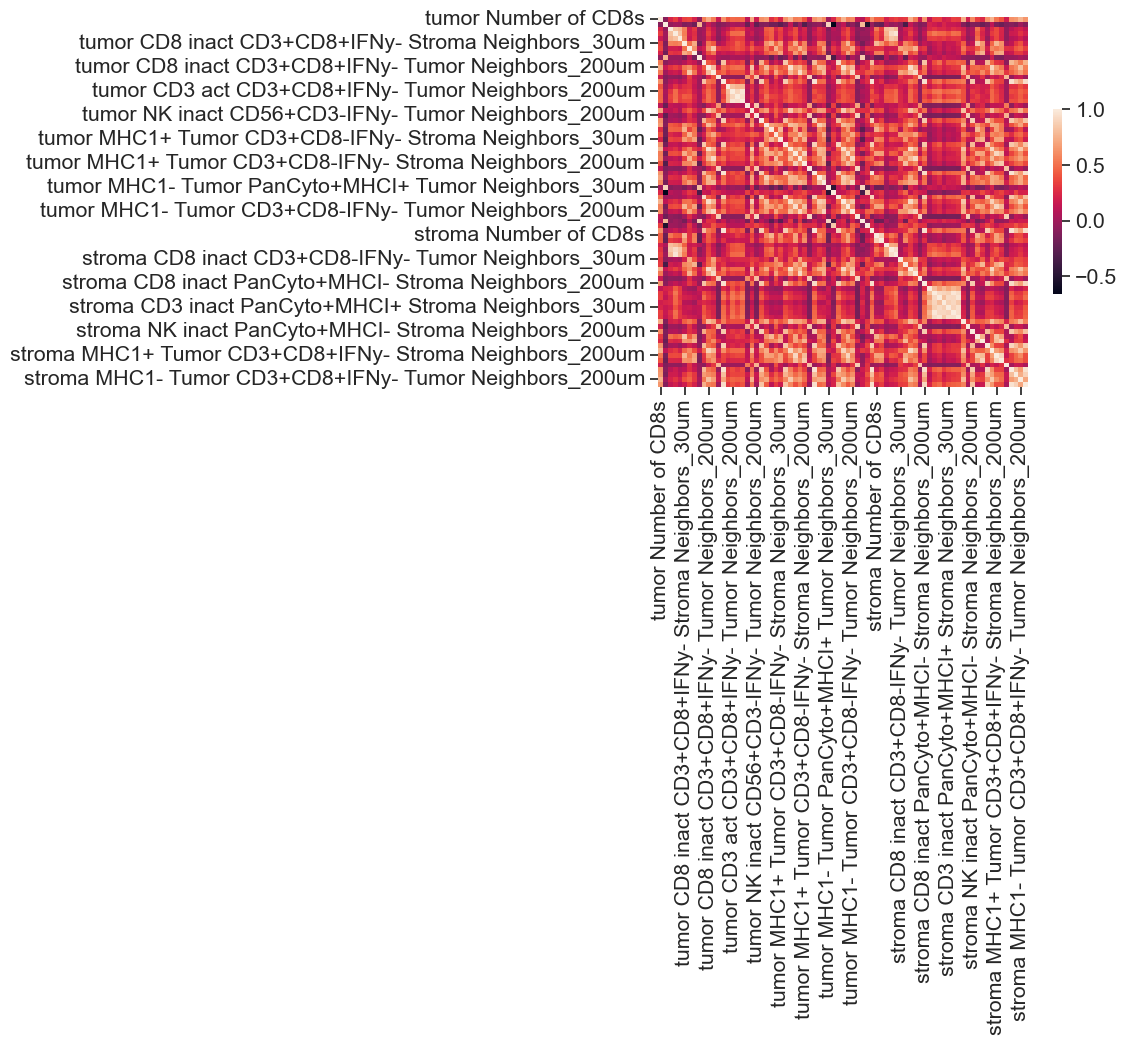

In [58]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_filt,
            square=True, cbar_kws={"shrink": .5})
#plt.title('HLA subunit Expression Correlations') 
plt.xlabel(None)
plt.ylabel(None)
#plt.savefig('/home/gh8sj/projects/gabe_kate_method/figures/nsclc/final_figures/fig_6d_network_heatmap.png', bbox_inches= 'tight')


/home/gh8sj/.local/lib/python3.11/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


Text(486.3295454545454, 0.5, '')

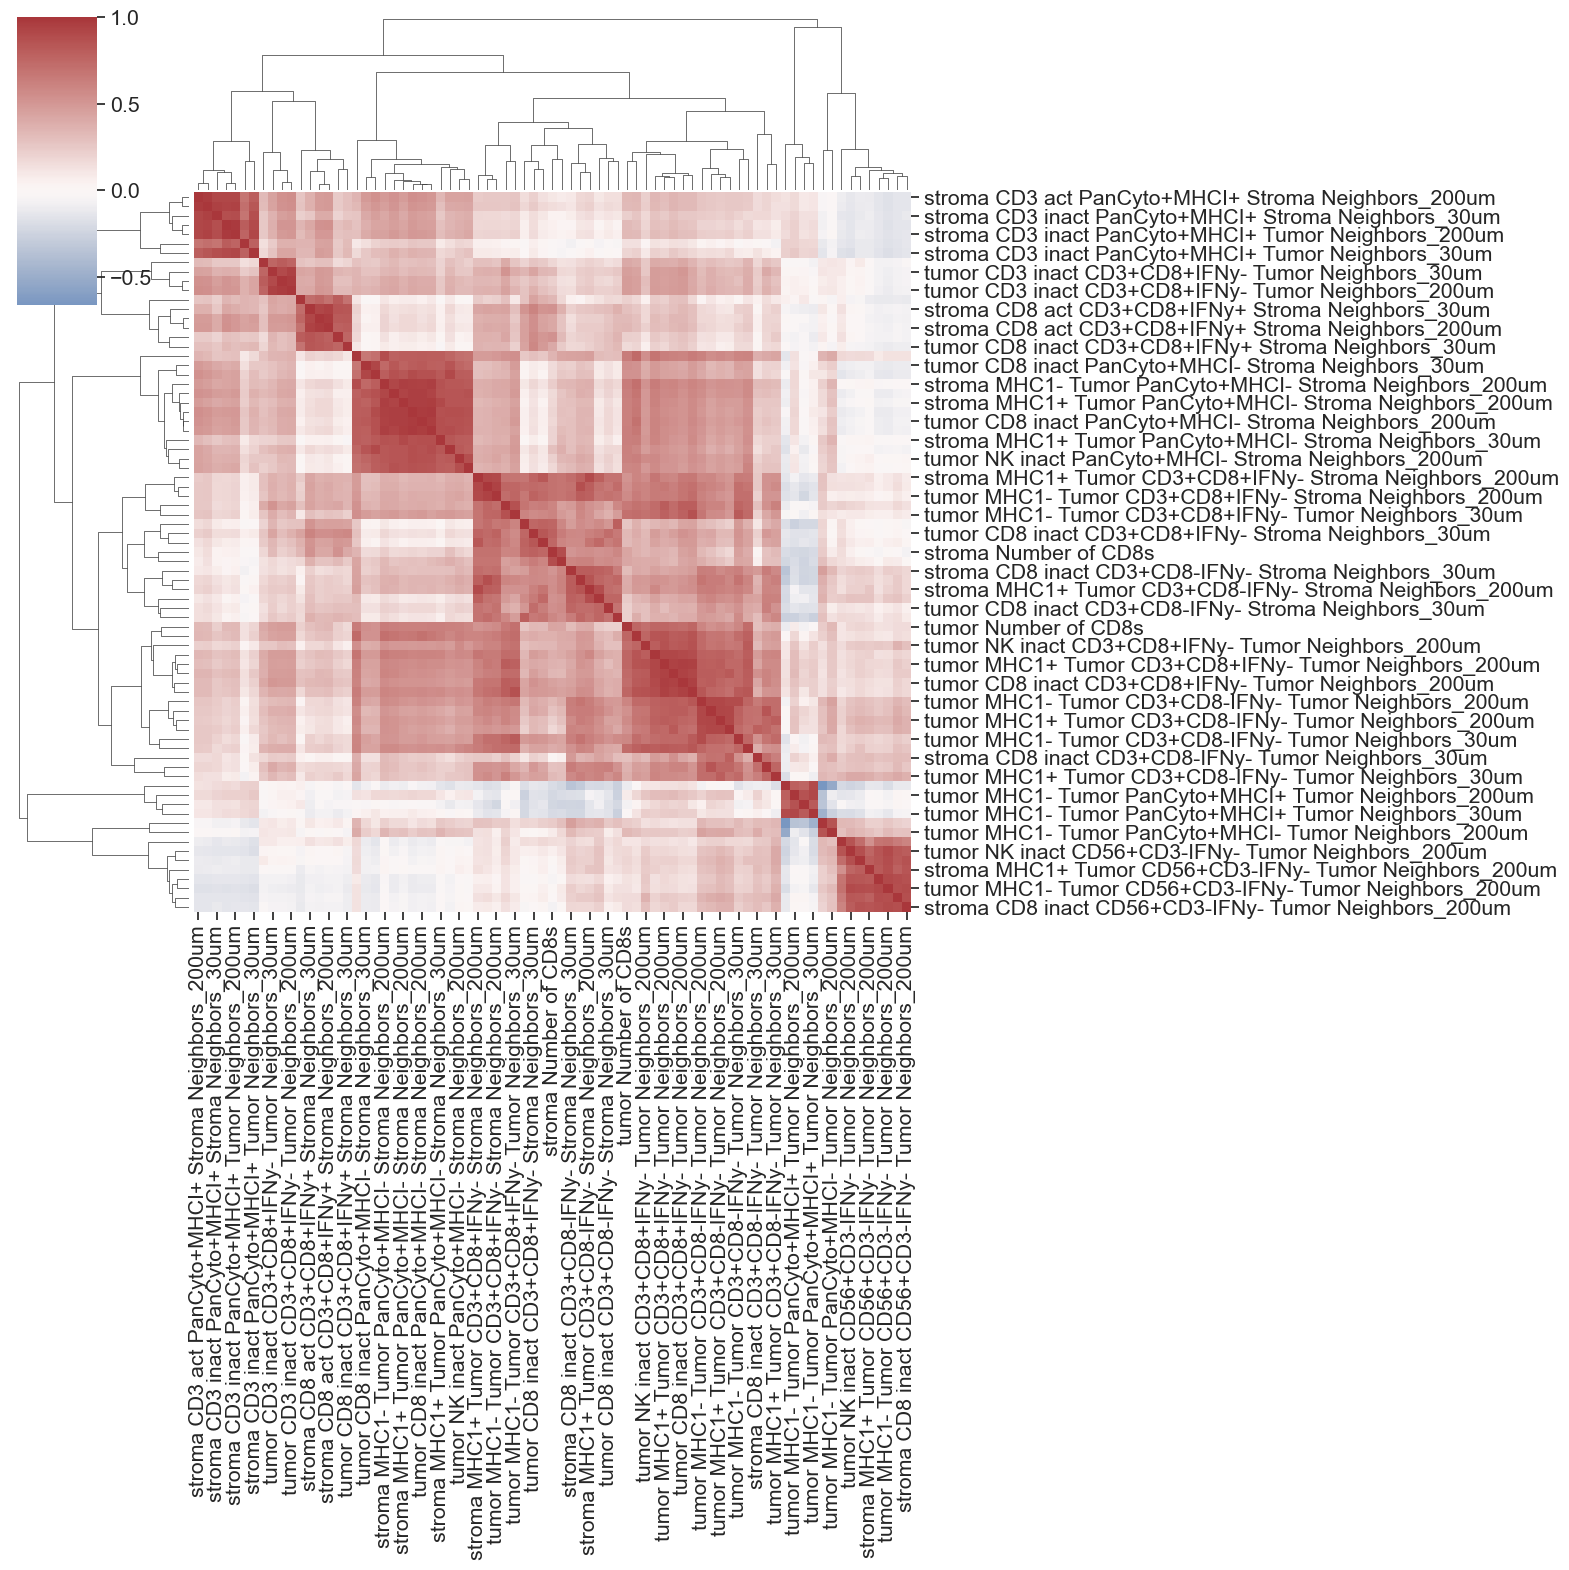

In [45]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.clustermap(corr_filt,
            square=True, cbar_kws={"shrink": .5}, figsize = (16,16), cmap = 'vlag', center = 0)
#plt.title('HLA subunit Expression Correlations') 
plt.xlabel(None)
plt.ylabel(None)
#plt.savefig('/home/gh8sj/projects/gabe_kate_method/figures/nsclc/final_figures/fig_6d_clustered_network_heatmap.png', bbox_inches= 'tight')


In [49]:
# Build your graph
G=nx.from_pandas_edgelist(plsr_links_filtered, 'var1', 'var2')
color = []
for v, data in G.nodes(data=True):
    if v in color_dict.keys():
        color.append(color_dict[v])
    else:
        color.append('orange')
color;

node_sizes = []
for v, data in G.nodes(data=True):
    if v in color_dict.keys():
        node_sizes.append(50)
    else:
        node_sizes.append(2.5)
        
pos = nx.spring_layout(G, seed = 42)

In [50]:
def draw(G, pos, measures, measure_name, save = False, file=''):
    
    # for dynamic coloring related to measures of connectivity 
    #nodes = nx.draw_networkx_nodes(G, pos, node_size=5, cmap=plt.cm.plasma, 
    #                               node_color=list(measures.values()),
    #                               nodelist=measures.keys())
    
    # for specific coloring I set
    color = []
    for v, data in G.nodes(data=True):
        if v in color_dict.keys():
            color.append(color_dict[v])
        else:
            color.append('black')
    color;
    
    node_sizes = []
    for v, data in G.nodes(data=True):
        if v in color_dict.keys():
            node_sizes.append(50)
        else:
            node_sizes.append(2.5)
            
    nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, 
                                   node_color=list(color),
                                   nodelist=measures.keys())
    
    # 
    # log-scale colormap for better visualization and contrast
    # nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    
    # turn labels on?
    node_labels = {}
    for v, data in G.nodes(data=True):
        if v in color_dict.keys():
            node_labels[v] = v
        else:
            node_labels[v] = v
#            node_labels[v] = ''

    labels = nx.draw_networkx_labels(G, pos, labels = node_labels, font_color='k', font_size = 9)
    
    edges = nx.draw_networkx_edges(G, pos, width =0.15)


    plt.title(measure_name)
    #plt.colorbar()
    plt.axis('off')
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    if save == True:
        plt.savefig(file, bbox_inches = 'tight')
    else:
        return
    plt.show()
    

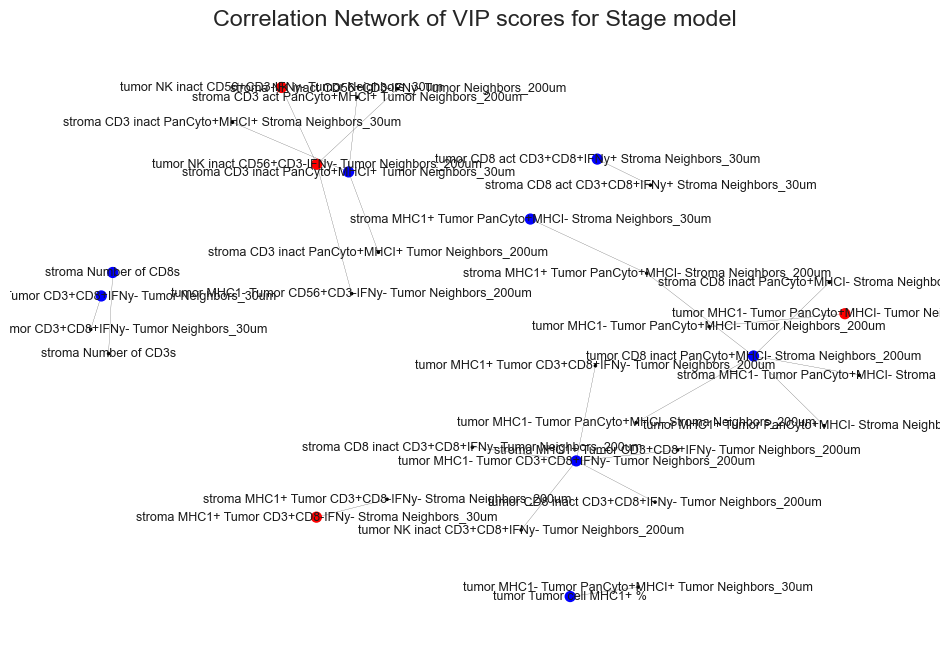

In [51]:
pos = nx.spring_layout(G, k=2, iterations=250)
draw(G, pos, nx.degree_centrality(G), 'Correlation Network of VIP scores for Stage model', save = False, file = '/home/gh8sj/projects/gabe_kate_method/figures/nsclc/final_figures/fig_6d_network.pdf')#,format='pdf', bbox_inches = 'tight')

#draw(G, pos, nx.degree_centrality(G), 'Correlation Network of VIP scores for Stage model', save = True, file = '/home/gh8sj/projects/gabe_kate_method/figures/nsclc/final_figures/fig_6d_network.pdf')#,format='pdf', bbox_inches = 'tight')
#draw(G, pos, nx.degree_centrality(G), 'Correlation Network of VIP scores for Stage model', save = True, file = '/home/gh8sj/projects/gabe_kate_method/figures/nsclc/final_figures/fig_6d_network.png')

